In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/well-logging-challenge/F02-1_logs.las
/kaggle/input/exported/Exported.csv


# Day 1 

# Kindly load the las file of F02-1_logs.las well from the data folder
# Answer the following questions:
# How many well logs in the file ?
# How many data points (observations) in the welllogs ?
# Is there any null values? how much (%)/ well-log ?
# Is there a relationship between DT and RHOB?
# You can use the following liberaries for your assignment:
# Numpy, Pandas, Matplotlib, seaborn, LASIO

# Import and load Libraries 

In [2]:
pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 580.7 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import lasio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [4]:
las = lasio.read('/kaggle/input/well-logging-challenge/F02-1_logs.las')

# Convert las file to dataframe by using pandas

In [5]:
df = las.df()

In [6]:
df = df.reset_index('DEPTH')

In [7]:
df.head()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN


#  How many well logs in the file ?


In [8]:
df.columns

Index(['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE'], dtype='object')

# Number of well logs = 6 well logs

# How many data points (observations) in the welllogs ?


In [9]:
df.shape

(9680, 7)

# number of data points in welllogs = 9680

# Is there any null values? how much (%)/ well-log ?


In [10]:
df.isnull().sum().sum()

6215

In [11]:
sns.heatmap(df.isnull())
plt.show()

NameError: name 'sns' is not defined

# Number of null values = 6215 

#  (%)/ well-log

In [ ]:
#put in number of null value in variable 
null_value = df.isnull().sum().sum()
# Get the number of rows in the well
num_rows = len(df)
#calculate % of null value / well
percentage = null_value *100 / num_rows
print(f'the percentage of null value / well log is:-{percentage} %')

# Pecentage of null value / well log = 64.20454545454545

# Is there a relationship between DT(Sonic)and RHOB(Density)?


In [ ]:
import seaborn as sns
corr = df["RHOB"].corr(df["DT"])
print(corr)

In [ ]:
corr1 = df.corr()
sns.heatmap(corr1, annot=True, fmt='.2f', cmap='RdYlGn', vmin=-1, vmax=1)

# Day 2 : Data Loading and Manipulation
# You can use the following liberaries for your assignment:
# Numpy, Pandas, Matplotlib, seaborn, LASIO

# Kindly load the las file of F02-1_logs.las well from the data folder
# Perform the below Tasks:
# 1-Plot histogram for every well-log in the las file
# 2-Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.25,0.5,0.75])
# 3-Using np.log() transform the well logs into log of values
# 4-Plot histogram for every well-log after transforming them

# Import and load Libraries 

In [ ]:
import lasio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
las = lasio.read('/kaggle/input/well-logging-challenge/F02-1_logs.las')

# Convert las file to dataframe by using pandas

In [ ]:
df = las.df()

In [ ]:
df = df.reset_index('DEPTH')

In [ ]:
df

# EDA

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())
plt.show()

# Trying to replace null value with mean 

# Q1 - Plot histogram for every well-log in the las file


In [ ]:
df.hist(bins=50,figsize=(10,10))
plt.show()

# Q3- Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.25,0.5,0.75])

In [ ]:
df.describe()

# Q3 -Using np.log() transform the well logs into log of values

In [ ]:
# Apply the natural logarithm to each value in the DataFrame
df_log = np.log(df)

df_log

# Q4-Plot histogram for every well-log after transforming them 

In [ ]:
df_log.hist(bins=50,figsize=(10,10))
plt.show()

# Day 3 : Data Loading and Manipulation and Visulatiozation
You can use the following liberaries for your assignment:
Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

* Kindly load the las file of F02-1_logs.las well from the data folder
* Perform the below Tasks:
1. * Plot well logs using matplotlib for every well-log in the las file
2. * Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
3. * Calculate the VP log from the DT sonic curve.
4. * Calculate the VP log using AI and RHOB log.
5. * Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?

In [12]:
#import libraries 
import lasio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#load data
las  = lasio.read('/kaggle/input/well-logging-challenge/F02-1_logs.las')

In [16]:
#convert las file to dataframe
df = las.df()

In [17]:
df = df.reset_index('DEPTH')

In [18]:
df

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN


In [ ]:
# EDA AND PREPROCESSING
df.info()

# Q1. Plot well logs using matplotlib for every well-log in the las file 

In [ ]:
df.columns

In [ ]:
# DEPTH    .M                  : 1     DEPTH
 #RHOB     .kg/m3              : 2     Density
 #DT       .us/m               : 3     Sonic
 #GR       .API                : 4     Gamma Ray
 #AI       .(m/s)*(kg/m3)      : 5     P-Impedance
 #AI_rel   .(m/s)*(kg/m3)      : 6     P-Impedance_rel
 #PHIE     .fraction           : 7     Porosity

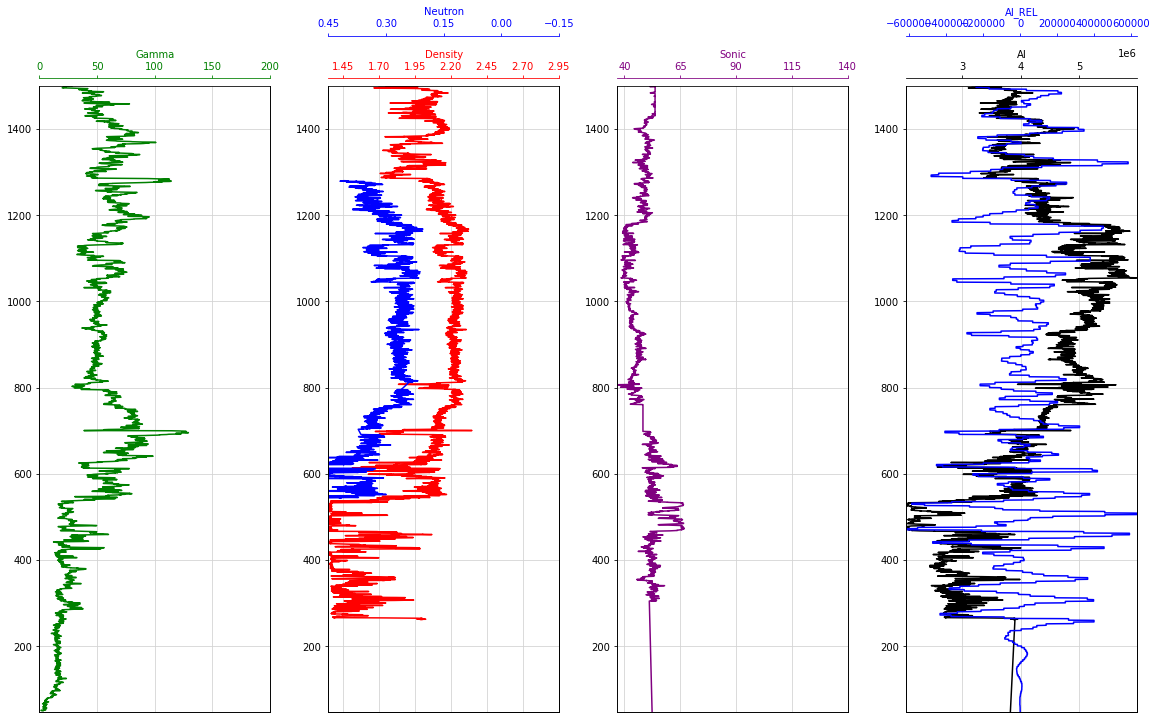

In [19]:
fig , ax = plt.subplots(figsize=(20 , 10))

#increase space between graphs
fig.subplots_adjust(wspace=0.5)


#Set up the plot axes
ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax4 = ax2.twiny()
ax5 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax6 = ax5.twiny()


# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)
ax10 = ax5.twiny()
ax10.xaxis.set_visible(False)



# Gamma Ray track
ax1.plot('GR','DEPTH',data = df , color = 'green')
ax1.set_xlabel("Gamma") # x-label name 
ax1.set_xlim(0, 200) # Xscale from to 
ax1.set_xticks([0, 50, 100, 150, 200] ) # number of scale line
ax1.xaxis.label.set_color("green") # color of label
ax1.spines["top"].set_edgecolor("green")  # position and color of line scale 
ax1.tick_params(axis='x', colors="green") # color of numbers on scale line 


# Density track
ax2.plot(df["RHOB"]/1000, "DEPTH", data = df, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim((df['RHOB']/1000).min(),(df['RHOB']/1000).max())
ax2.set_xticks([1.45,1.7,1.95,2.2,2.45,2.7,2.95])
ax2.xaxis.label.set_color("red")
ax2.spines["top"].set_edgecolor("red")
ax2.tick_params(axis='x', colors="red")


# Sonic track
ax3.plot(df["DT"]/10, "DEPTH", data = df, color = "purple")
ax3.set_xlabel("Sonic")
ax3.set_xlim((df['DT']/10).min(), (df['DT']/10).max())
ax3.set_xticks([40,65,90,115,140])
ax3.xaxis.label.set_color("purple")
ax3.spines["top"].set_edgecolor("purple") 
ax3.tick_params(axis='x', colors="purple")  



# Neutron track placed ontop of density track
ax4.plot("PHIE", "DEPTH", data = df, color = "blue")
ax4.set_xlabel('Neutron')
ax4.set_xlim(0.45, -0.15)
ax4.set_xticks([0.45, 0.3, 0.15,0, -0.15])
ax4.xaxis.label.set_color("blue")
ax4.spines["top"].set_edgecolor("blue")
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)



# AI track
ax5.plot("AI", "DEPTH", data = df, color = "black")
ax5.set_xlabel("AI")
ax5.set_xlim(df['AI'].min(), df['AI'].max())
#ax5.set_xticks()
ax5.xaxis.label.set_color("black")
ax5.spines["top"].set_edgecolor("black") # color and position of line scale 
ax5.tick_params(axis='x', colors="black") # colors of number on scale line 


# AI_REL track placed ontop of density track
ax6.plot("AI_REL", "DEPTH", data = df, color = "blue")
ax6.set_xlabel('AI_REL')
ax6.set_xlim(df['AI_REL'].min(), df['AI_REL'].max())
#ax6.set_xticks([0.45, 0.3, 0.15,0, -0.15])
ax6.xaxis.label.set_color("blue")
ax6.spines["top"].set_edgecolor("blue")
ax6.tick_params(axis='x', colors="blue")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)


for ax in [ax1, ax2, ax3,ax5]:
    ax.set_ylim(df['DEPTH'].min(), df['DEPTH'].max())
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.01235))
    
plt.tight_layout()

# 2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.


In [ ]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Calculate the statistics
    min_val = df[col].min()
    max_val = df[col].min()
    pct_10 =np.percentile(df, 10)
    pct_25 =np.percentile(df, 25)
    pct_50 = np.percentile(df, 50)
    pct_75 = np.percentile(df, 75)
    pct_90 =np.percentile(df, 90)
    pct_100 = np.percentile(df, 100)
    
    
    # Print the column name and statistics
    print(f" - Minimun values for {col} is {min_val} ")
    print(f" - Maximun values for {col} is {max_val} ")
    print(f" - 10 %  values for {col} is {pct_10} ")
    print(f" - 25 %  values for {col} is {pct_25} ")
    print(f" - 50 % values for {col} is {pct_50} ")
    print(f" - 75 % values for {col} is {pct_75} ")
    print(f" - 90 % values for {col} is {pct_90} ")
    print(f" - 100 % values for {col} is {pct_100} ")
    print('______________________________________________________')
    
    
    
    
   
   

# 3. Calculate the VP log from the DT sonic curve.


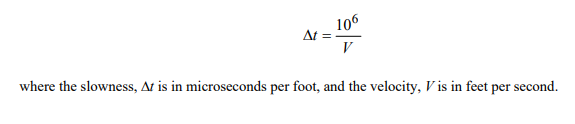

In [ ]:
# where vp = 10^6/DT

In [22]:
df['VP_DT'] = (10**6) / df['DT']
df['VP_DT']

0       1908.220327
1       1908.247637
2       1908.274584
3       1908.301531
4       1908.327751
           ...     
9675    1879.089251
9676    1869.644637
9677    1861.538055
9678    1861.285813
9679    1860.869834
Name: VP_DT, Length: 9680, dtype: float64

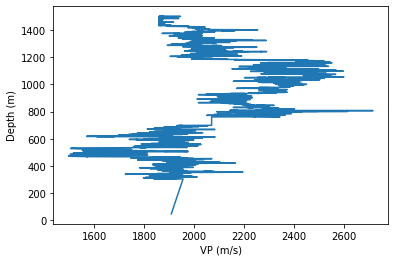

In [27]:
# Plot VP log VS depth
plt.plot(df['VP_DT'], df['DEPTH'])
plt.xlabel('VP (m/s)')
plt.ylabel('Depth (m)')
plt.show()

# Q4- Calculate the VP log using AI and RHOB log.


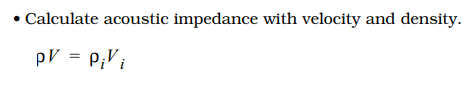

In [24]:
# Acoustic Impedance (Z) = Velocity (c) * Density (ρ) 

# Calculate VP log values
df['VP_AI_RHOB'] = df['AI'] / df['RHOB']

df['VP_AI_RHOB']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
9675    1879.120317
9676    1869.600800
9677    1861.533886
9678    1861.285814
9679    1860.873172
Name: VP_AI_RHOB, Length: 9680, dtype: float64

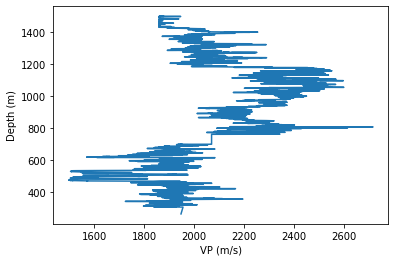

In [25]:
# Plot VP log VS depth
plt.plot(df['VP_AI_RHOB'], df['DEPTH'])
plt.xlabel('VP (m/s)')
plt.ylabel('Depth (m)')
plt.show()

# Q5. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?

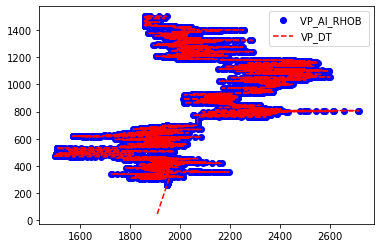

In [33]:
# Plot the first curve
plt.plot(df['VP_AI_RHOB'], df['DEPTH'], 'o', color='blue', label='VP_AI_RHOB ')

# Plot the second curve
plt.plot(df['VP_DT'], df['DEPTH'], '--', color='red', label='VP_DT')

# Add a legend to the graph
plt.legend()

# Show the graph
plt.show()

# As we see there is no difference between two graphs both havse

# Day 4 : Data Loading and Manipulation and Visulatiozation
### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly
## Kindly load the las file of Exported.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. plot the null values as bars
3. fill in null values using three different methods.
4. produce statistics of the different methods and plot them.
5. which method do you prefer?


# Loading libraries and data

In [ ]:
#import libraries 
import lasio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import welly

In [ ]:
df  = pd.read_csv('/kaggle/input/exported/Exported.csv')

In [ ]:
df

# Q1 - Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics)

In [ ]:
df.shape

In [ ]:
# numbers of columns 
number_of_colum = df.shape[1]
print(f'number of calumns is {number_of_colum}')

In [ ]:
# number of observation 
number_of_observation = df.shape[0]
print(f'number of observation is {number_of_observation}')

In [ ]:
# Null values
df.isnull().sum()

In [ ]:
#Sum null values
null_value = df.isnull().sum().sum()
print(f'number of Null Values is {null_value}')

In [ ]:
#mapping of null value
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#normal statistics 
df.describe()

# Q3. fill in null values using three different methods.


In [ ]:
# Create a copy of the original dataset
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#Full null value with backword value
df1.fillna(method='bfill', inplace=True)

#Full null value with forword value
df2.fillna(method='ffill', inplace=True)

#Full null value with constant value
df3.fillna(0, inplace=True)

# 4. produce statistics of the different methods and plot them.


In [ ]:
#statistics of null value filled with backword value
df1.describe()


In [ ]:
#check null value 
df1.isnull().sum().sum()

In [ ]:
#plot df1
df1.plot()
plt.show()


In [ ]:
#statistics of null value filled with forkword value
df2.describe()


In [ ]:
#check null value 
df2.isnull().sum().sum()

In [ ]:
df2.plot()
plt.show()

In [ ]:
#statistics of null value filled with constant value = zero
df3.describe()


In [ ]:
#check null value 
df3.isnull().sum().sum()

In [ ]:
df3.plot()
plt.show()

# we have more than one method to fill null value like (min , max , median , mode , medain ,ffill , bfill and with constant value ) but i prefer mean method 


# Day 5 : Data Loading and Manipulation and Visulatiozation
### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly
## Kindly load the las file of Exported.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot the null values as bars
3. Fill in null values using three different methods.
4. Create three facies Log for with 3 different scenarios.
5. Plot the three Facies scenarios vs Depth



In [ ]:
pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv('/kaggle/input/exported/Exported.csv')

In [ ]:
df

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")


In [ ]:
profile

In [ ]:
# numbers of columns 
number_of_colum = df.shape[1]
print(f'number of calumns is {number_of_colum}')

In [ ]:
# number of observation 
number_of_observation = df.shape[0]
print(f'number of observation is {number_of_observation}')

In [ ]:
#Sum null values
null_value = df.isnull().sum().sum()
print(f'number of Null Values is {null_value}')

In [ ]:
#mapping of null value
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#normal statistics 
df.describe()

In [ ]:
# Create a copy of the original dataset
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#Full null value with backword value
df1.fillna(df.mean())

#Full null value with forword value
df2.fillna(df.mode())

#Full null value with constant value
df3.fillna(df.median())